In [1]:
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals

from experiments.hospital import HospitalGroups

import os
import time
import math
import numpy as np
import tensorflow as tf
import itertools

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
E = HospitalGroups.load_run('hospital_seed-0')

Loading phase 0-cross_validation from previous run:
/home/hubert/influence/output/hospital_groups/hospital_seed-0/result_0-cross_validation.npz
Loading phase 1-initial_training from previous run:
/home/hubert/influence/output/hospital_groups/hospital_seed-0/result_1-initial_training.npz
Loading phase 3-hessian from previous run:
/home/hubert/influence/output/hospital_groups/hospital_seed-0/result_3-hessian.npz
Loading phase 4-pick_subsets from previous run:
/home/hubert/influence/output/hospital_groups/hospital_seed-0/result_4-pick_subsets.npz
Loading phase 5-compute_self_infl from previous run:
/home/hubert/influence/output/hospital_groups/hospital_seed-0/result_5-compute_self_infl.npz
Loading phase 6-test_infl from previous run:
/home/hubert/influence/output/hospital_groups/hospital_seed-0/result_6-test_infl.npz
Loading phase 7-compute_subset_test_infl from previous run:
/home/hubert/influence/output/hospital_groups/hospital_seed-0/result_7-compute_subset_test_infl.npz
Loading phase 

In [3]:
def find_most_influential(subset_tags, subset_indices, influence, K=20, influence_type="influence",
                          filter_fn=None):
    if filter_fn is not None:
        filter_idx = [i for i, tag in enumerate(subset_tags) if filter_fn(i, tag, subset_indices[i])]
        subset_tags = subset_tags[filter_idx]
        subset_indices = subset_indices[filter_idx]
        influence = influence[filter_idx]
    idx = np.argsort(influence)

    print("Positive removal influence:")
    for i in idx[:-K:-1]:
        print("{}: {} points, {} {}".format(
            subset_tags[i], len(subset_indices[i]), influence_type, influence[i]))
    print()

In [4]:
subset_tags, subset_indices = E.R['subset_tags'], E.R['subset_indices']
fixed_test = E.R['fixed_test']

# Rank demographic subsets
by average fixed test, average test, and self group influence

In [5]:
demographic = lambda i, tag, indices: "demographic=True" in tag

In [6]:
find_most_influential(subset_tags, subset_indices, np.mean(E.R['subset_fixed_test_infl'], axis=1),
                      influence_type='average fixed test influence',
                      filter_fn=demographic)

Positive removal influence:
demographic=True,gender_Female=1: 10732 points, average fixed test influence 0.53280454874
demographic=True,gender_Female=1_race_Caucasian=1: 7883 points, average fixed test influence 0.48851236701
demographic=True,gender_Female=1_age_[60-70)=1: 2140 points, average fixed test influence 0.477167874575
demographic=True,age_[60-70)=1: 4388 points, average fixed test influence 0.439881891012
demographic=True,race_Caucasian=1_age_[60-70)=1: 3281 points, average fixed test influence 0.349977642298
demographic=True,gender_Female=1_age_[40-50)=1: 927 points, average fixed test influence 0.134249284863
demographic=True,gender_Female=1_age_[50-60)=1: 1617 points, average fixed test influence 0.127739563584
demographic=True,race_Caucasian=1: 15069 points, average fixed test influence 0.107183657587
demographic=True,race_Caucasian=1_age_[50-60)=1: 2241 points, average fixed test influence 0.0990241840482
demographic=True,race_AfricanAmerican=1_age_[60-70)=1: 806 points

In [7]:
find_most_influential(subset_tags, subset_indices, E.R['subset_avg_test_infl'],
                      influence_type='average test influence',
                      filter_fn=demographic)

Positive removal influence:
demographic=True,race_Caucasian=1_age_[80-90)=1: 2984 points, average test influence 0.00177317485213
demographic=True,race_AfricanAmerican=1_age_[50-60)=1: 827 points, average test influence 0.00169498496689
demographic=True,gender_Female=1_age_[60-70)=1: 2140 points, average test influence 0.00167330389377
demographic=True,gender_Male=1_race_Caucasian=1: 7186 points, average test influence 0.00144392508082
demographic=True,race_Caucasian=1_age_[60-70)=1: 3281 points, average test influence 0.00104728236329
demographic=True,gender_Female=1_race_AfricanAmerican=1: 2261 points, average test influence 0.000959674420301
demographic=True,race_Caucasian=1: 15069 points, average test influence 0.000835195649415
demographic=True,gender_Male=1_age_[80-90)=1: 1341 points, average test influence 0.000829741940834
demographic=True,gender_Female=1: 10732 points, average test influence 0.000698215328157
demographic=True,race_AfricanAmerican=1_age_[70-80)=1: 766 points, a

In [8]:
find_most_influential(subset_tags, subset_indices, E.R['subset_self_infl'],
                      influence_type='self influence',
                      filter_fn=demographic)

Positive removal influence:
demographic=True,race_Caucasian=1: 15069 points, self influence 31.0223579407
demographic=True,gender_Female=1: 10732 points, self influence 29.119556427
demographic=True,gender_Male=1: 9268 points, self influence 27.5205745697
demographic=True,gender_Female=1_race_Caucasian=1: 7883 points, self influence 21.337146759
demographic=True,gender_Male=1_race_Caucasian=1: 7186 points, self influence 19.8659515381
demographic=True,age_[80-90)=1: 3478 points, self influence 12.6182317734
demographic=True,age_[60-70)=1: 4388 points, self influence 12.1115846634
demographic=True,age_[70-80)=1: 5256 points, self influence 10.9926185608
demographic=True,race_Caucasian=1_age_[80-90)=1: 2984 points, self influence 10.2521038055
demographic=True,age_[50-60)=1: 3262 points, self influence 9.31988525391
demographic=True,race_Caucasian=1_age_[60-70)=1: 3281 points, self influence 9.13317298889
demographic=True,race_Caucasian=1_age_[70-80)=1: 4199 points, self influence 8.2329

# Rank other subsets

In [9]:
not_too_big = lambda i, tag, indices: len(indices) <= 20000 / 4

In [10]:
find_most_influential(subset_tags, subset_indices, np.mean(E.R['subset_fixed_test_infl'], axis=1),
                      influence_type='average fixed test influence',
                      filter_fn=not_too_big)

Positive removal influence:
demographic=False,age_[60-70)=1_discharge_disposition_id_6=1: 600 points, average fixed test influence 0.590052545071
demographic=False,discharge_disposition_id_6=1_insulin_Steady=1: 783 points, average fixed test influence 0.512294471264
demographic=False,A1Cresult_None=1_insulin_Steady=1: 4973 points, average fixed test influence 0.507629573345
demographic=False,gender_Female=1_insulin_Steady=1: 3245 points, average fixed test influence 0.504861235619
demographic=False,discharge_disposition_id_6=1_change_No=1: 1352 points, average fixed test influence 0.494163304567
demographic=False,metformin_No=1_insulin_Steady=1: 4883 points, average fixed test influence 0.492789387703
demographic=False,discharge_disposition_id_6=1_glyburide_No=1: 2443 points, average fixed test influence 0.489262551069
demographic=False,discharge_disposition_id_6=1_pioglitazone_No=1: 2543 points, average fixed test influence 0.486634343863
demographic=True,gender_Female=1_age_[60-70)=1

In [11]:
find_most_influential(subset_tags, subset_indices, E.R['subset_avg_test_infl'],
                      influence_type='average test influence',
                      filter_fn=not_too_big)

Positive removal influence:
demographic=False,discharge_disposition_id_11=1_acarbose_No=1: 179 points, average test influence 0.00383062008768
demographic=False,discharge_disposition_id_11=1_miglitol_No=1: 179 points, average test influence 0.00383062008768
demographic=False,discharge_disposition_id_11=1_tolazamide_No=1: 179 points, average test influence 0.00383062008768
demographic=False,discharge_disposition_id_11=1: 179 points, average test influence 0.00383062008768
demographic=False,discharge_disposition_id_11=1_chlorpropamide_No=1: 179 points, average test influence 0.00383062008768
demographic=False,discharge_disposition_id_11=1_nateglinide_No=1: 178 points, average test influence 0.00381375360303
demographic=False,discharge_disposition_id_11=1_repaglinide_No=1: 178 points, average test influence 0.00381357176229
demographic=False,discharge_disposition_id_11=1_glyburide-metformin_No=1: 178 points, average test influence 0.00381336640567
demographic=False,discharge_disposition_i

In [22]:
find_most_influential(subset_tags, subset_indices, E.R['subset_self_infl'],
                      influence_type='self influence',
                      filter_fn=not_too_big, K=50)

Positive removal influence:
demographic=False,discharge_disposition_id_11=1: 179 points, self influence 24.3917331696
demographic=False,discharge_disposition_id_11=1_chlorpropamide_No=1: 179 points, self influence 24.3917331696
demographic=False,discharge_disposition_id_11=1_acarbose_No=1: 179 points, self influence 24.3917331696
demographic=False,discharge_disposition_id_11=1_miglitol_No=1: 179 points, self influence 24.3917331696
demographic=False,discharge_disposition_id_11=1_tolazamide_No=1: 179 points, self influence 24.3917331696
demographic=False,discharge_disposition_id_11=1_nateglinide_No=1: 178 points, self influence 24.1684589386
demographic=False,discharge_disposition_id_11=1_repaglinide_No=1: 178 points, self influence 24.1678028107
demographic=False,discharge_disposition_id_11=1_glyburide-metformin_No=1: 178 points, self influence 24.1670532227
demographic=False,discharge_disposition_id_11=1_glimepiride_No=1: 173 points, self influence 22.8869876862
demographic=False,disc

# Subset perturbation recovery

In [13]:
perturb_subsets = E.R['perturb_subsets']

In [14]:
def rank(value):
    idx = np.argsort(value)
    rank = np.zeros_like(idx)
    rank[idx] = np.arange(len(idx))
    return rank

In [15]:
def rank_among_subsets(group_infl, subset_idx):
    return rank(group_infl)[subset_idx]

In [16]:
def average_rank_among_train(indiv_infl, indices):
    return np.mean(rank(indiv_infl)[indices])

In [17]:
def compare_group_and_indiv_infl(subset_tags, subset_indices, perturb_subsets,
                                 group_infl, indiv_infl,
                                 perturb_group_infl, perturb_indiv_infl,
                                 infl_type='influence'):
    i_group_infl = group_infl[perturb_subsets]
    f_group_infl = np.take_along_axis(perturb_group_infl, perturb_subsets.reshape(-1, 1), axis=1).T
    i_indiv_infl = np.array([np.sum(indiv_infl[subset_indices[subset_idx]])
                             for subset_idx in perturb_subsets])
    f_indiv_infl = np.array([np.sum(perturb_indiv_infl[i][subset_indices[subset_idx]])
                             for i, subset_idx in enumerate(perturb_subsets)])
    
    i_group_rank = np.array([rank_among_subsets(group_infl, subset_idx)
                             for subset_idx in perturb_subsets])
    f_group_rank = np.array([rank_among_subsets(perturb_group_infl[i], subset_idx)
                             for i, subset_idx in enumerate(perturb_subsets)])
    i_indiv_rank = np.array([average_rank_among_train(indiv_infl, subset_indices[subset_idx])
                             for subset_idx in perturb_subsets])
    f_indiv_rank = np.array([average_rank_among_train(perturb_indiv_infl[i], subset_indices[subset_idx])
                             for i, subset_idx in enumerate(perturb_subsets)])
        
    fig, axs = plt.subplots(1, 2, figsize=(16,8), squeeze=False)
    
    def movement_plot(ax, initial_x, initial_y, final_x, final_y):
        ax.scatter(initial_x, initial_y, marker='.', color='r')
        ax.scatter(final_x, final_y, marker='.', color='g')
        ax.quiver(initial_x, initial_y,
                  final_x - initial_x, final_y - initial_y,
                  width=0.001, angles='xy', scale_units='xy', scale=1)
    
    movement_plot(axs[0][0], i_group_infl, i_indiv_infl, f_group_infl, f_indiv_infl)
    axs[0][0].set_ylabel('Total indiv {} of subset elements'.format(infl_type))
    axs[0][0].set_xlabel('Group {} of subset'.format(infl_type))
    axs[0][0].set_title('Influence movement due to perturbation')
    
    movement_plot(axs[0][1], i_group_rank, i_indiv_rank, f_group_rank, f_indiv_rank)
    axs[0][1].set_ylabel('Average rank of subset elements by indiv {}'.format(infl_type))
    axs[0][1].set_xlabel('Rank of subset by group {}'.format(infl_type))
    axs[0][1].set_title('Rank movement due to perturbation')
    
    fig.savefig('../{}.png'.format(infl_type), dpi=150)

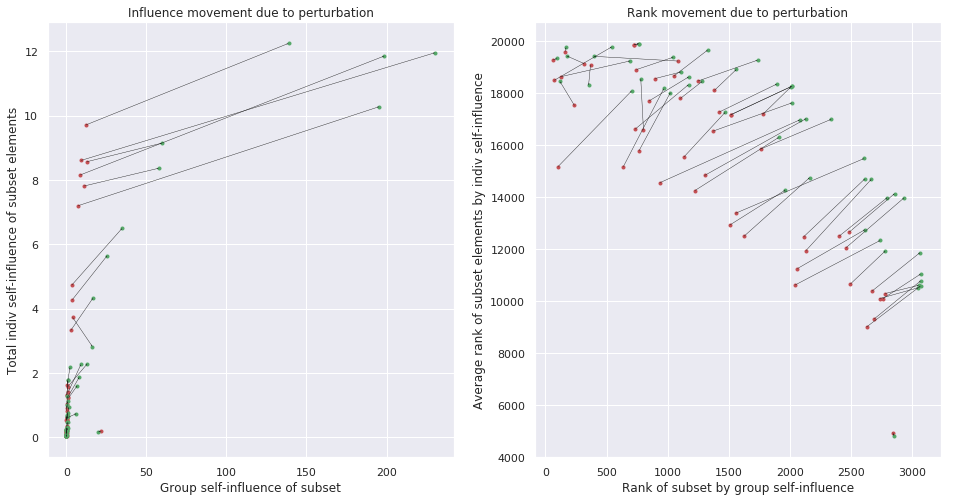

In [18]:
compare_group_and_indiv_infl(subset_tags, subset_indices, perturb_subsets,
                             E.R['subset_self_infl'], E.R['self_infl'],
                             E.R['perturb_subset_self_infl'], E.R['perturb_self_infl'],
                             infl_type='self-influence')

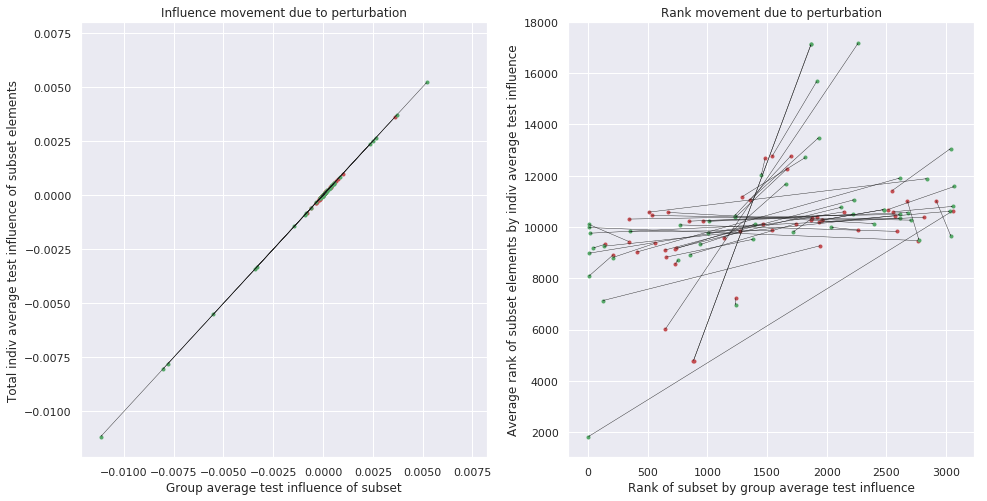

In [19]:
compare_group_and_indiv_infl(subset_tags, subset_indices, perturb_subsets,
                             E.R['subset_avg_test_infl'], E.R['avg_test_infl'],
                             E.R['perturb_subset_avg_test_infl'], E.R['perturb_avg_test_infl'],
                             infl_type='average test influence')

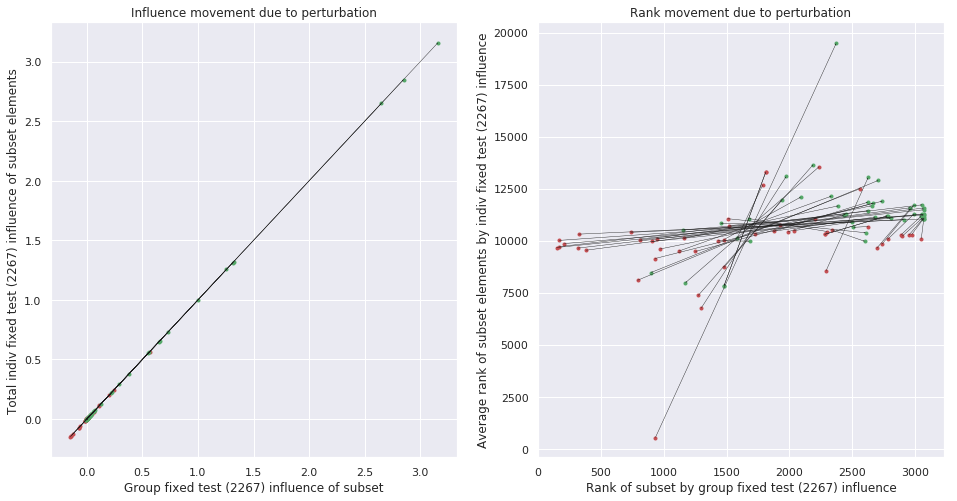

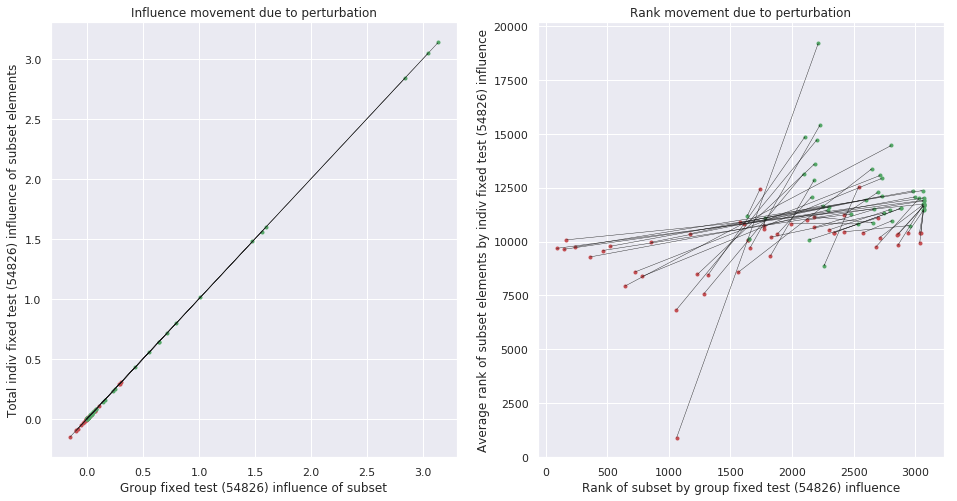

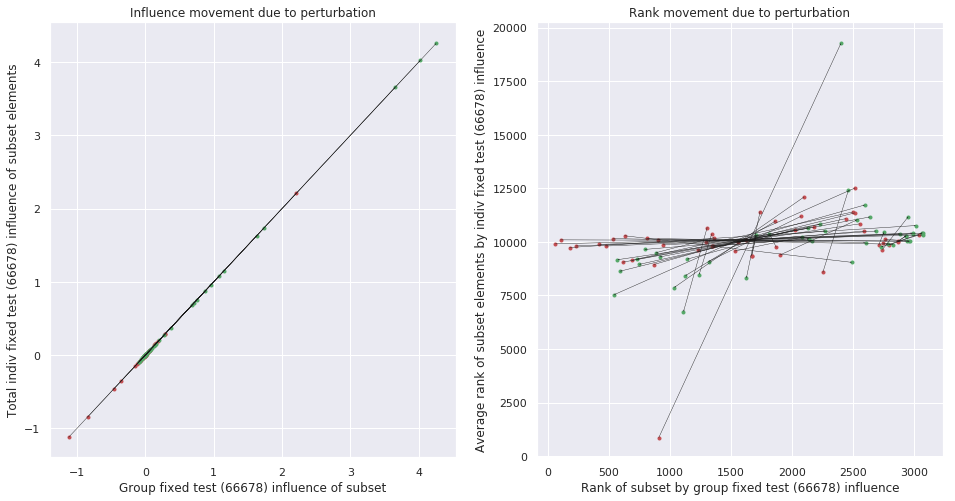

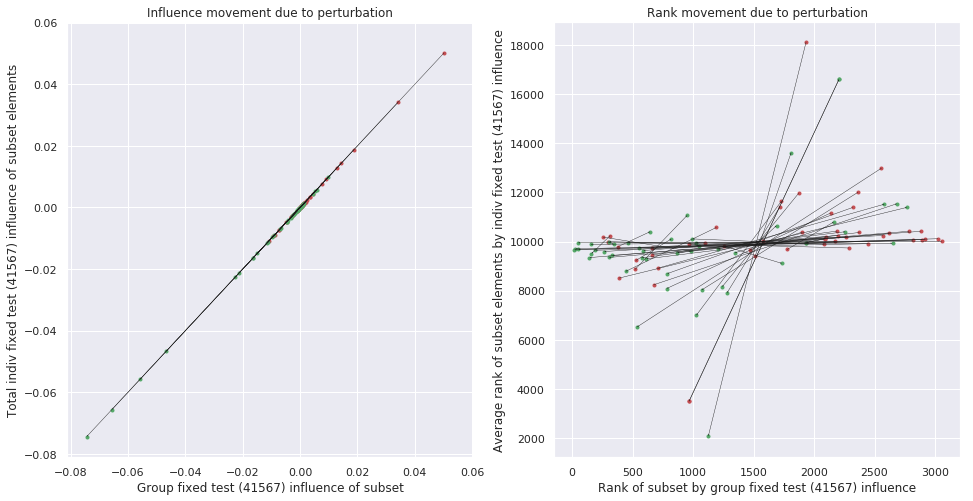

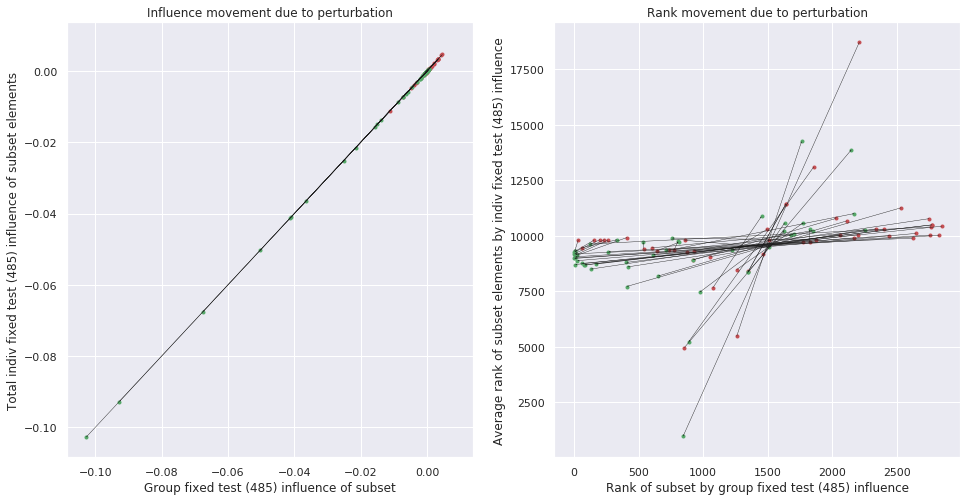

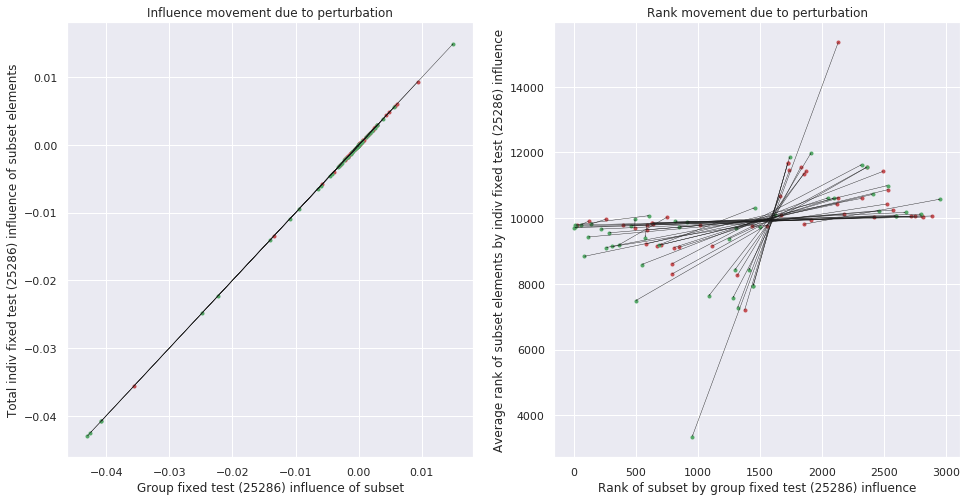

In [20]:
for i, test_idx in enumerate(E.R['fixed_test']):
    compare_group_and_indiv_infl(subset_tags, subset_indices, perturb_subsets,
                             E.R['subset_fixed_test_infl'][:, i], E.R['fixed_test_infl'][i, :],
                             E.R['perturb_subset_fixed_test_infl'][:, :, i], E.R['perturb_fixed_test_infl'][:, i, :],
                             infl_type='fixed test ({}) influence'.format(test_idx))

# asdf

In [23]:
subset_tags[E.R['perturb_subsets']]

array([u'demographic=False,discharge_disposition_id_6=1_insulin_Steady=1',
       u'demographic=False,gender_Male=1_glimepiride_Steady=1',
       u'demographic=False,race_?=1_glimepiride_Down=1',
       u'demographic=False,glipizide_Up=1_diabetesMed_Yes=1',
       u'demographic=False,age_[80-90)=1_nateglinide_No=1',
       u'demographic=False,discharge_disposition_id_11=1_glipizide_No=1',
       u'demographic=True,race_?=1_age_[80-90)=1',
       u'demographic=False,race_?=1_glipizide_Steady=1',
       u'demographic=False,age_[90-100)=1_nateglinide_Steady=1',
       u'demographic=False,race_AfricanAmerican=1_max_glu_serum_>200=1',
       u'demographic=False,glimepiride_Down=1_insulin_Down=1',
       u'demographic=False,gender_Female=1_discharge_disposition_id_24=1',
       u'demographic=False,metformin_Up=1_insulin_Up=1',
       u'demographic=False,A1Cresult_>8=1_metformin_Steady=1',
       u'demographic=False,age_[70-80)=1_insulin_Up=1',
       u'demographic=False,age_[80-90)=1_A1Cresu

In [24]:
perturb_id = 6
subset_tags[perturb_subsets[perturb_id]]

u'demographic=True,race_?=1_age_[80-90)=1'

In [28]:
find_most_influential(subset_tags, subset_indices, E.R['perturb_subset_fixed_test_infl'][perturb_id, :, 3],
                      influence_type='fixed test ({}) influence'.format(E.R['fixed_test'][3]),
                      filter_fn=not_too_big, K=50)

Positive removal influence:
demographic=False,age_[80-90)=1_repaglinide_No=1: 3380 points, fixed test (41567) influence 0.0544396452606
demographic=False,age_[80-90)=1_nateglinide_No=1: 3442 points, fixed test (41567) influence 0.054286532104
demographic=False,age_[80-90)=1_max_glu_serum_None=1: 3264 points, fixed test (41567) influence 0.053703263402
demographic=False,gender_Male=1_insulin_No=1: 4151 points, fixed test (41567) influence 0.0532141663134
demographic=False,age_[80-90)=1_chlorpropamide_No=1: 3471 points, fixed test (41567) influence 0.052349884063
demographic=False,age_[80-90)=1_glipizide_No=1: 2951 points, fixed test (41567) influence 0.0517578236759
demographic=False,age_[80-90)=1_tolazamide_No=1: 3476 points, fixed test (41567) influence 0.0516131557524
demographic=True,age_[80-90)=1: 3478 points, fixed test (41567) influence 0.0513803474605
demographic=False,age_[80-90)=1_miglitol_No=1: 3475 points, fixed test (41567) influence 0.05076514557
demographic=False,age_[80-

In [43]:
indiv_infl = E.R['perturb_fixed_test_infl'][perturb_id, 3, :]

In [44]:
feature_id = np.where(E.train.feature_names == 'age_[80-90)')[0][0]

In [45]:
idx = np.argsort(indiv_infl)

In [47]:
K = 50

In [52]:
top = E.train.x[idx[:-K:-1], :]
top_mean = np.mean(top, axis=0)
all_mean = np.mean(E.train.x, axis=0)
feature_score = top_mean - all_mean
feature_idx = np.argsort(feature_score)

In [55]:
feature_idx[:20]

array([ 78, 125,   7,   4,  59,   5,  27,  84,  22, 115,  92,  88,  12,
        62,  24,  32,  79, 114,   6,  56])

In [56]:
np.where(feature_idx == feature_id)[0][0]

115

In [57]:
len(feature_idx)

127

In [63]:
E.train.feature_names[feature_idx[:-20:-1]]

array([u'num_lab_procedures', u'num_medications', u'time_in_hospital',
       'glimepiride_Up', u'num_procedures', 'diabetesMed_Yes',
       'discharge_disposition_id_18', 'glimepiride_Down', 'glipizide_No',
       'race_Caucasian', 'A1Cresult_>8', 'age_[80-90)', 'insulin_Up',
       'glyburide_No', 'pioglitazone_Steady', 'insulin_Down',
       'A1Cresult_>7', 'age_[90-100)', 'max_glu_serum_None'], dtype=object)